# Лабораторная работа "Уравнение теплопроводности"

In [1]:
from ipywidgets import interact, widgets, interactive
from computations.grid import *
from computations.diff_eq import *

$$
\begin{equation*}
    \begin{cases}
    u_t = a^2u_{xx}, \ 0<x<L, \ 0<t<T, \\
    u(0, t) = u_1(t) \\
    u(L, t) = u_2(t) \\
    u(x, 0) = u_3(x) \\
    \end{cases}
\end{equation*}
$$

In [8]:
L = 10.0
T = 10.0

a = 2.0
u1 = lambda t: 0.2
u2 = lambda t: 1.0
u3 = lambda x: 0.5

c = 0.5
h = 0.2
tau = c * h * h / a / a

gf1 = GridFunction([0.0, 0.0], [L, T], [h, tau])
gf2 = GridFunction([0.0, 0.0], [L, T], [h, tau])
gf3 = GridFunction([0.0, 0.0], [L, T], [h, tau])

therma21_ex(gf1, u1, u2, u3, a)
therma21_im(gf2, u1, u2, u3, a)
crunk_nicholson22_im(gf3, u1, u2, u3, a)

def plot_slice(t):
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    ax[0].set(title='Явная схема')
    ax[1].set(title='Неявная схема')
    ax[2].set(title='Схема Кранка-Никольсона')
    ax[0].grid(); ax[1].grid(); ax[2].grid()
    ax[0].set_ylim([0.0, 1.5])
    ax[1].set_ylim([0.0, 1.5])
    ax[2].set_ylim([0.0, 1.5])

    gf1.plot(xaxis=['x', 0], yaxis=['y', [0, int(t * gf1.n[1])], 0], ext_plt=ax[0])
    gf2.plot(xaxis=['x', 0], yaxis=['y', [0, int(t * gf2.n[1])], 0], ext_plt=ax[1])
    gf3.plot(xaxis=['x', 0], yaxis=['y', [0, int(t * gf3.n[1])], 0], ext_plt=ax[2])

widg = interactive(plot_slice, t=widgets.FloatSlider(min=0.0,max=0.99,step=0.0001,value=0.0))
widg

interactive(children=(FloatSlider(value=0.0, description='t', max=0.99, step=0.0001), Output()), _dom_classes=…

### Задача Дирихле для уравненияя Пуассона

$$
\begin{equation*}
    \begin{cases}
    u_{xx} + u_{yy} = f(x, y), \ 0<x<A, \ 0<y<B, \\
    u(0, y) = u_1(y) \\
    u(A, y) = u_2(y) \\
    u(x, 0) = u_3(x) \\
    u(x, B) = u_4(x) \\
    \end{cases}
\end{equation*}
$$
$\Delta(sin(x)sin(y)) = -2sin(x)sin(y)$

" \ndef plot_slice(t):\n    fig, ax = plt.subplots(figsize=(15,5))\n    ax.grid()\n    gf.plot(xaxis=['x', 0], yaxis=['y', [0, int(t * gf.n[1])], 0], ext_plt=ax)\n\nwidg = interactive(plot_slice, t=widgets.FloatSlider(min=0.0,max=0.99,step=0.0001,value=0.0))\nwidg\n"

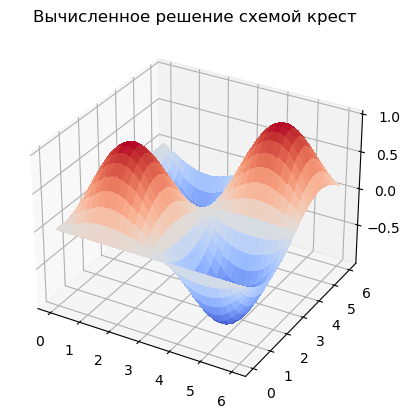

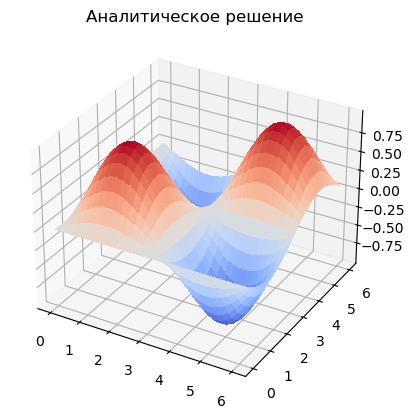

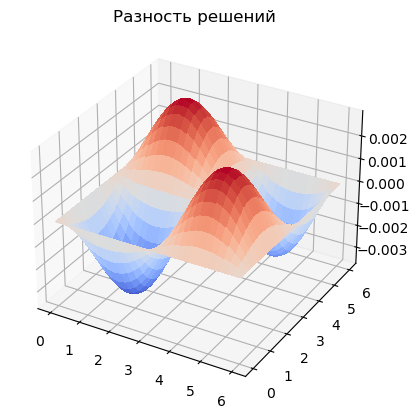

In [9]:
A = B = 6.0

u = lambda x: m.sin(x[0]) * m.sin(x[1])
f = lambda x: -2.0 * m.sin(x[0]) * m.sin(x[1])
u1 = lambda y: u([0.0, y])
u2 = lambda y: u([A, y])
u3 = lambda x: u([x, 0.0])
u4 = lambda x: u([x, B])

hx = 0.2
hy = 0.2
eps = 0.1

gf = GridFunction([0.0, 0.0], [A, B], [hx, hy])
cross22_im(gf, f, u1, u2, u3, u4, eps)
gf.plot(xaxis=['x', 0], yaxis=['x', 1], zaxis=['z', [0, 0], 0], title_str='Вычисленное решение схемой крест')

tf = GridFunction([0.0, 0.0], [A, B], [hx, hy])
tf.calc(u)
tf.plot(xaxis=['x', 0], yaxis=['x', 1], zaxis=['z', [0, 0], 0], title_str='Аналитическое решение')
tf.y -= gf.y
tf.plot(xaxis=['x', 0], yaxis=['x', 1], zaxis=['z', [0, 0], 0], title_str='Разность решений')

""" 
def plot_slice(t):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.grid()
    gf.plot(xaxis=['x', 0], yaxis=['y', [0, int(t * gf.n[1])], 0], ext_plt=ax)

widg = interactive(plot_slice, t=widgets.FloatSlider(min=0.0,max=0.99,step=0.0001,value=0.0))
widg
"""

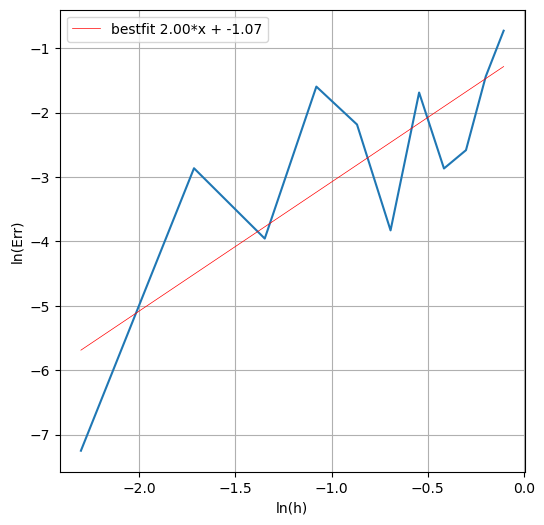

In [20]:
def plot_log_err(begin_h, end_h, step_h):
    gf_err = GridFunction(begin_h, end_h, step_h)
    u = lambda x: m.sin(x[0]) * m.sin(x[1])
    f = lambda x: -2.0 * m.sin(x[0]) * m.sin(x[1])
    u1 = lambda y: u([0.0, y])
    u2 = lambda y: u([A, y])
    u3 = lambda x: u([x, 0.0])
    u4 = lambda x: u([x, B])

    for i in range(gf_err.n):
        hx = hy = gf_err.x[i]
        eps = 0.1

        gf = GridFunction([0.0, 0.0], [A, B], [hx, hy])
        cross22_im(gf, f, u1, u2, u3, u4, eps)

        tf = GridFunction([0.0, 0.0], [A, B], [hx, hy])
        tf.calc(u)

        err = np.amax(np.abs(gf.y - tf.y))
        gf_err.y[i] = m.log(err)
        gf_err.x[i] = m.log(gf_err.x[i])

    fig, ax = plt.subplots(figsize=(6,6))
    ax.grid()
    gf_err.plot(ext_plt=ax)
    k, b = np.polyfit(gf_err.x, gf_err.y, 1)
    label = 'bestfit {:.2f}*x + {:.2f}'.format(k, b)
    ax.plot(gf_err.x, k * gf_err.x + b, 'r-', linewidth=0.5, label=label)
    ax.set(xlabel='ln(h)', ylabel='ln(Err)')
    ax.legend()

plot_log_err(0.1, 0.9, 0.08)